### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


In [2]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

In [3]:
df=pd.read_csv("vehicle.csv").dropna()

In [4]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [5]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [6]:
df["class"].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

In [ ]:
# Convert class object to Category datatype

In [7]:
df["class"]=df["class"].astype("category")

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

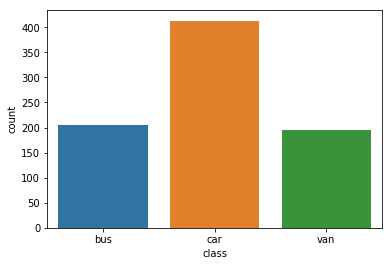

In [155]:
sns.countplot("class",data=df)
plt.show()

### Check for any missing values in the data 

In [9]:
df.isna().values.any()

False

### 3. Standardize the data 

In [ ]:
# Check datatypes - 

In [10]:
df.dtypes

compactness                       int64
circularity                     float64
distance_circularity            float64
radius_ratio                    float64
pr.axis_aspect_ratio            float64
max.length_aspect_ratio           int64
scatter_ratio                   float64
elongatedness                   float64
pr.axis_rectangularity          float64
max.length_rectangularity         int64
scaled_variance                 float64
scaled_variance.1               float64
scaled_radius_of_gyration       float64
scaled_radius_of_gyration.1     float64
skewness_about                  float64
skewness_about.1                float64
skewness_about.2                float64
hollows_ratio                     int64
class                          category
dtype: object

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [ ]:
# Split the dependent and independent variables into different datatypes

In [11]:
df_independent=df.drop(columns="class")

In [ ]:
# Standardize the independent variables using Z score

In [12]:
from scipy.stats import zscore

df_z = df_independent.apply(zscore)

In [ ]:
# Merge the datasets into one

In [13]:
df_z["class"]=df["class"]

In [156]:
# Assign Dummies for the categorical column

In [ ]:
df_z_dummies=pd.get_dummies(df_z)

In [ ]:
df_z_dummies.head()

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [15]:
distortion=[]

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [173]:
cluster_range = range( 2, 10)   
cluster_errors = []
cluster_sil_scores = []
distortion=[]
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_z_dummies)
  c_ft=clusters.fit_predict(df_z_dummies) 
  distortion.append(((df_z_dummies - clusters.cluster_centers_[c_ft])**2.0).sum(axis=1))
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(df_z_dummies, labels, metric='euclidean'))
  

In [174]:
distortion

[0        9.282581
 1        2.424473
 2        3.330769
 3        9.616697
 4      185.167633
 6       12.314386
 7        5.176559
 8       17.565358
 10       7.162040
 11      16.014642
 12       4.522306
 13       2.196523
 14      14.941509
 15       5.497727
 16      17.796980
 17      13.092913
 18       2.508561
 20       6.376118
 21      17.656718
 22      10.742160
 23       4.538468
 24       4.804707
 25       4.385681
 26      15.853171
 27       5.130678
 28      10.641276
 29      10.970830
 30       3.591355
 31       7.329322
 32       8.691051
           ...    
 816      8.950109
 817      6.857451
 818      9.627534
 819     11.000864
 820      8.912183
 821      4.781960
 822      9.754851
 823      2.063367
 824      2.805818
 825      7.034811
 826     15.157439
 827      9.020475
 828      4.899494
 829      9.200367
 830     15.121821
 831     14.389133
 832      4.946532
 833      6.078240
 834     20.851297
 835     35.883324
 836      2.742112
 837      7.

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [175]:
cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
c_ft = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_z_dummies)
  c_ft=clusters.fit_predict(df_z_dummies) 
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(df_z_dummies, labels, metric='euclidean'))






# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,9065.460317,0.380556
1,3,7480.633371,0.280140
2,4,6176.793238,0.292672
3,5,6342.060598,0.208100
4,6,5131.975201,0.226412
5,7,4723.846836,0.221265
6,8,4447.149422,0.214988
7,9,4164.372254,0.206507


### 6. Plotting Elbow/ Scree Plot

In [ ]:
# Sum of Squares is the object Cluster Errors

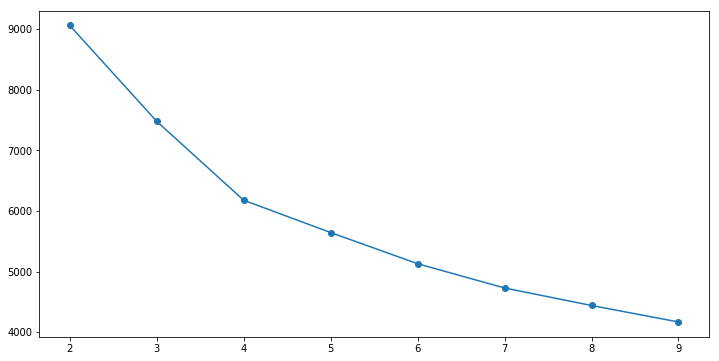

In [30]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [ ]:
#4

In [176]:
clusters.fit_predict(centroids)

array([5, 0, 4, 1, 8, 7, 6, 2, 3])

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [ ]:
# Provided in the above block

Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [177]:
# Derived from the above block
labels

array([3, 3, 8, 4, 7, 4, 4, 4, 4, 4, 3, 3, 5, 8, 0, 2, 8, 6, 0, 4, 4, 8,
       3, 0, 8, 5, 0, 3, 4, 4, 8, 2, 6, 7, 8, 6, 5, 0, 3, 2, 8, 3, 3, 6,
       3, 2, 0, 2, 8, 4, 1, 4, 5, 3, 8, 0, 5, 0, 0, 6, 5, 0, 8, 3, 5, 8,
       2, 0, 3, 5, 2, 6, 3, 8, 4, 0, 2, 1, 3, 0, 2, 0, 8, 2, 8, 3, 6, 8,
       3, 3, 5, 6, 7, 4, 4, 0, 5, 5, 2, 6, 5, 3, 3, 0, 0, 3, 3, 5, 8, 5,
       0, 3, 4, 0, 3, 3, 6, 3, 3, 5, 5, 2, 2, 0, 8, 7, 3, 4, 0, 3, 2, 8,
       6, 5, 8, 3, 2, 4, 2, 5, 5, 2, 8, 3, 1, 2, 0, 2, 0, 8, 2, 4, 8, 8,
       2, 8, 6, 0, 8, 1, 4, 8, 3, 2, 2, 2, 0, 8, 0, 4, 0, 5, 2, 2, 3, 8,
       2, 5, 3, 1, 2, 6, 8, 6, 6, 6, 3, 2, 8, 8, 4, 3, 3, 6, 8, 2, 4, 2,
       1, 0, 6, 8, 6, 4, 8, 3, 6, 0, 4, 8, 4, 8, 6, 0, 0, 6, 8, 4, 3, 2,
       8, 6, 2, 4, 6, 8, 3, 0, 2, 2, 8, 0, 8, 3, 4, 3, 8, 2, 4, 5, 8, 0,
       2, 4, 4, 5, 6, 5, 4, 0, 6, 5, 2, 1, 4, 6, 0, 8, 2, 5, 6, 6, 8, 3,
       3, 5, 0, 4, 7, 3, 4, 1, 4, 5, 0, 2, 2, 8, 4, 2, 4, 6, 3, 8, 8, 8,
       5, 3, 3, 8, 6, 0, 4, 5, 0, 8, 1, 6, 5, 2, 6,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [41]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])

In [43]:
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])

In [ ]:
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [50]:
df_hier=pd.DataFrame(np.concatenate([a,b,c]))

In [53]:
df_hier.head()

,0,1
0,7.830172,1.819482
1,8.766113,-3.177736
2,12.079926,2.843430
3,9.257714,-0.749894
4,8.188880,-0.614224


### 10. Use scatter matrix to print all the 3 distributions

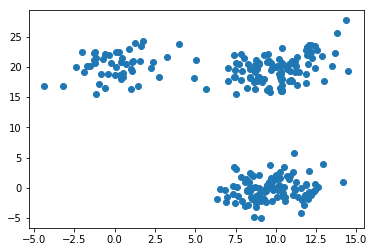

In [110]:
plt.scatter(df_hier[0],df_hier[1],cmap='bwr')

### 11. Find out the linkage matrix

In [78]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

Use ward as linkage metric and distance as Eucledian

In [69]:
Z = linkage(df_hier, 'ward','euclidean')


In [100]:
Z[1]


array([1.64000000e+02, 2.38000000e+02, 5.93213271e-02, 2.00000000e+00])

### 12. Plot the dendrogram for the consolidated dataframe

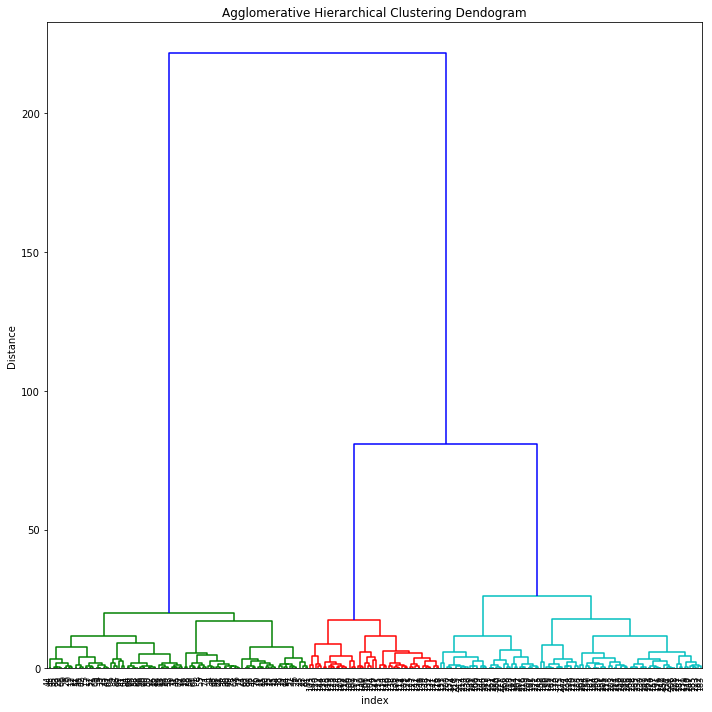

In [178]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

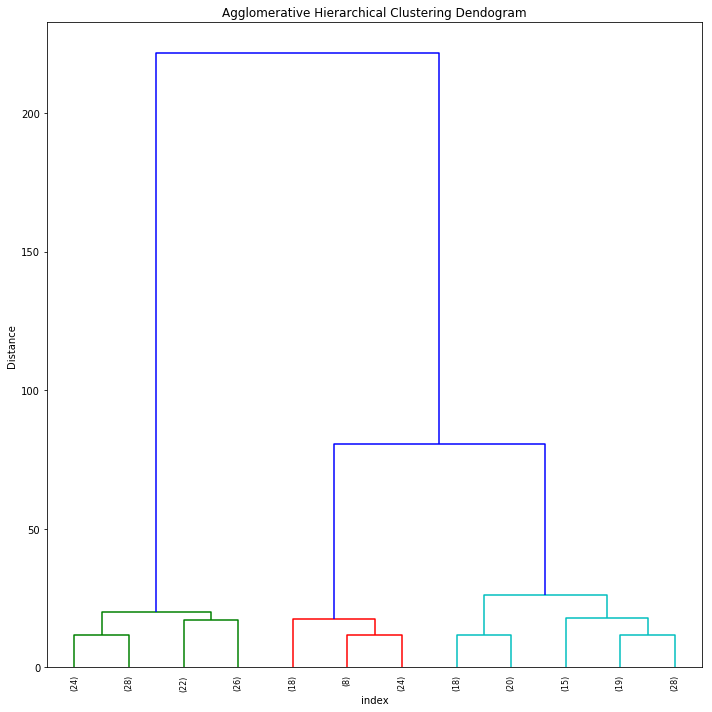

In [179]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('index')
plt.ylabel('Distance')
dendrogram(Z,p=12, leaf_rotation=90.,color_threshold = 30,truncate_mode='lastp', leaf_font_size=8. )
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [180]:
# Distance caluclated here

In [181]:
c, coph_dists = cophenet(Z , pdist(df_hier))

c

0.9509542897811835

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [77]:
pdist(df_hier)

array([5.08410952, 4.37137069, 2.93931456, ..., 2.77723209, 0.95561791,
       2.92500943])

In [113]:
fcluster(Z,c,criterion='distance')

array([  4,  26,  10,   7,   8,  29,  37,  25,  24,   3,  32,  31,   4,
        18,  36,  33,  17,   7,  35,  22,  16,  27,   5,  39,  34,  40,
         3,  37,  22,   2,  26,  20,  37,   8,  33,   2,  18,  33,  28,
        35,   6,  13,   6,   9,   1,   1,  20,  30,  27,  29,  17,   5,
         7,  18,  13,  24,  16,  37,  15,  23,  23,  23,  29,  30,  12,
        26,   2,   9,   8,  14,  31,   7,  21,   9,  25,  32,  30,  29,
        29,  20,  28,  38,  17,   2,  15,  31,  11,  30,  15,  19,  16,
        38,  17,  18,  36,  15,  27,  21,  30,  15,  50,  52,  48,  41,
        52,  60,  53,  49,  59,  49,  58,  59,  48,  57,  61,  56,  66,
        51,  66,  46,  44,  60,  43,  46,  47,  62,  47,  62,  46,  54,
        51,  63,  65,  45,  56,  59,  48,  65,  58,  65,  51,  66,  64,
        42,  43,  45,  57,  55,  65,  63,  97,  94,  69,  67,  93,  85,
        92, 100,  83, 102,  72,  74,  85,  90,  98,  98,  73,  99,  93,
        77,  86,  68,  88,  85,  69,  86, 100,  87,  95, 105,  7

### Use matplotlib to visually observe the clusters in 2D space 

In [182]:
from sklearn.cluster import AgglomerativeClustering

# Number of clusters can be changed here. It is taken as 12 here
cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df_hier)  

array([ 1,  7,  0,  1,  1,  7,  3,  7,  7,  1,  3,  3,  1,  0,  3,  3,  0,
        1,  3,  7,  0,  7,  1,  3,  3,  3,  1,  3,  7,  1,  7,  0,  3,  1,
        3,  1,  0,  3,  7,  3,  1,  0,  1,  1,  1,  1,  0,  3,  7,  7,  0,
        1,  1,  0,  0,  7,  0,  3,  0,  7,  7,  7,  7,  3,  0,  7,  1,  1,
        1,  0,  3,  1,  0,  1,  7,  3,  3,  7,  7,  0,  7,  3,  0,  1,  0,
        3,  0,  3,  0,  0,  0,  3,  0,  0,  3,  0,  7,  0,  3,  0,  2, 11,
        2,  2, 11,  6, 11,  2,  6,  2,  6,  6,  2,  6,  6,  6,  6, 11,  6,
        2,  2,  6,  2,  2,  2,  6,  2,  6,  2, 11, 11,  6,  6,  2,  6,  6,
        2,  6,  6,  6, 11,  6,  6,  2,  2,  2,  6, 11,  6,  6,  9,  9,  4,
        4,  9,  5,  9, 10,  5, 10,  4,  8,  5,  9, 10, 10,  4, 10,  9,  8,
        5,  4,  5,  5,  4,  5, 10,  5,  9, 10,  8,  9, 10, 10,  8, 10,  9,
       10,  5,  4,  5, 10,  8, 10,  9,  8,  5,  8,  5,  4,  4, 10,  8,  9,
        9,  9, 10,  8,  8,  8,  5,  9,  4,  4,  4,  8,  8,  9,  8,  8,  8,
        8,  5, 10,  8,  4

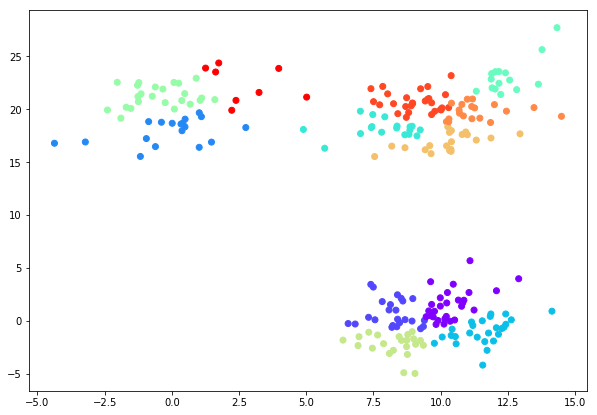

In [183]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_hier[0], df_hier[1], c=cluster.labels_, cmap='rainbow')  